In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import datetime

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

data = pd.read_csv('sales-cars.csv',index_col = [0],parse_dates=[0] , date_parser = parser)

In [3]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [8]:
data.Sales[0]

266

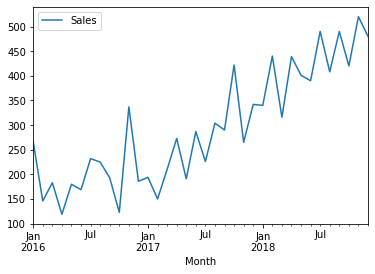

In [5]:
data.plot()

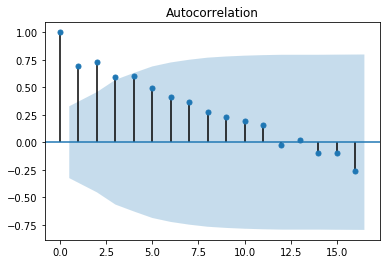

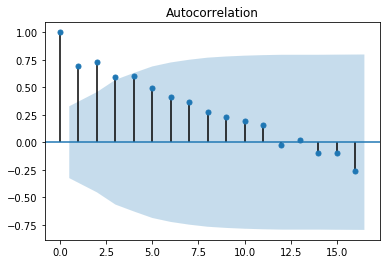

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

# Converting trend graph to Stationary graph

In [23]:
data_diff = data.diff(periods=1) #integrated order of 1, donoted by 'd'.
data_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [12]:
data_diff = data_diff[1:]

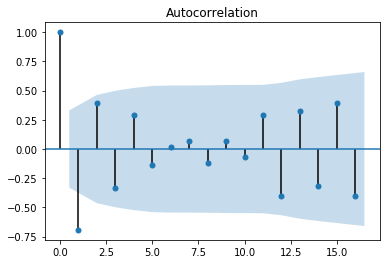

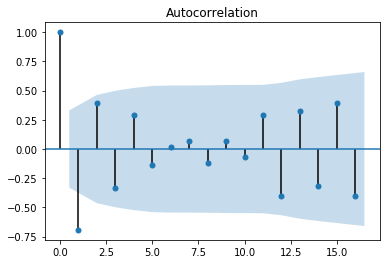

In [11]:
plot_acf(data_diff) 

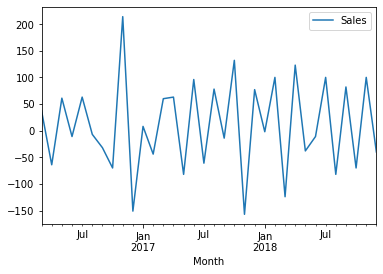

In [22]:
data_diff.plot()

# AUTO REGRESSIVE (AR) MODEL

In [56]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [57]:
x = data.values
x.size

36

In [80]:
train = x[:27]   # 27 data as train
test = x[26:]    # 9 data as test
prediction = []

In [81]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [82]:
prediction = model_ar_fit.predict(start = 26, end = 36)

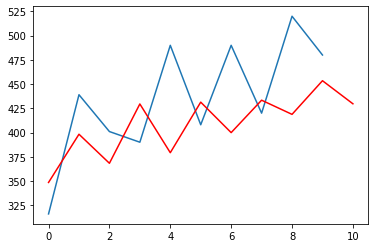

In [83]:
plt.plot(test)
plt.plot(prediction,c='r')

# ARIMA Model

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [125]:
#p,d,q
# p-> periods taken for the autoregressive model
# d->Integrsted order, difference
# q->periods in moving average
#311
#920
model_arima = ARIMA(train,order = (9,2,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.16198391849855


In [123]:
prediction = model_arima_fit.forecast(steps=10)[0]
prediction

array([396.04971228, 355.94178192, 413.09920955, 374.50686362,
       446.94546126, 378.61470789, 406.37823921, 411.37873512,
       475.88919843, 415.37338633])

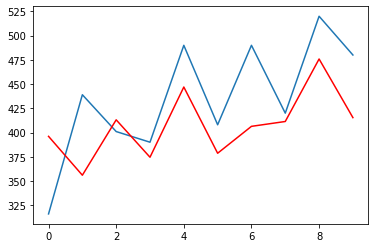

In [124]:
plt.plot(test)
plt.plot(prediction,c='r')

In [118]:
import itertools
p=d=q= range(0,5)
pdq = list(itertools.product(p,d,q))
len(pdq)
print(pdq[:10])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4)]


In [114]:
import warnings
warnings.filterwarnings('ignore')
for para in pdq:
    try:
        model_arima = ARIMA(train,order = para)
        model_arima_fit = model_arima.fit()
        print(para,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028728575
(0, 0, 3) nan
(0, 0, 4) 310.1669328576465
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415381062906
(0, 1, 2) 296.322922690801
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194741083694
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.04871745241866
(1, 0, 2) 310.97906422366304
(1, 0, 4) nan
(1, 1, 0) 298.8325442270784
(1, 1, 1) 297.1256511258498
(1, 1, 2) 299.4716667063481
(1, 1, 3) 301.2851180947781
(1, 1, 4) 299.978732397109
(1, 2, 0) 306.53077675711666
(1, 2, 3) nan
(2, 0, 0) 310.996957362129
(2, 0, 1) 340.1244967391351
(2, 0, 4) 341.428847585567
(2, 1, 0) 300.20895612399585
(2, 1, 1) 297.99999301673483
(2, 1, 2) 298.55054281302364
(2, 1, 3) 302.8720847853808
(2, 2, 0) 306.297585643219
(2, 2, 3) nan
(3, 0, 0) 312.9838587441584
(3, 0, 1) 336.20638633467416
(3, 0, 4) nan
(3, 1, 0) 294.85435842189526
(3, 1, 1) 295.99793534185784
(3, 1, 2) 292.6686238694238
(3, 1, 3) 294.6588907516449
(3, 2, 0) 299.4075868155

In [127]:
mean_squared_error(test,prediction)

2959.952796703588